In [245]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as patches

In [246]:
pd.set_option("display.max_columns", 500)

In [268]:
conn = sqlite3.connect("eia")
cursor = conn.cursor()
df = pd.DataFrame(cursor.execute("""select * from combined5""").fetchall())
df.columns = [description[0] for description in cursor.description]
df = df.drop(columns=["index", "level_0"])
df.head()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year,plant_id_gen,combined_heat_and_power_plant,plant_name_gen,operator_name_gen,state_gen,census_region,nerc_region,reserved_,naics_code,eia_sector_number,sector_name,reported_prime_mover,reported_fuel_type_code,aer_fuel_type_code,reserved_1,reserved_2,physical_unit_label,total_fuel_consumption_quantity,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,elec_fuel_consumption_mmbtu,net_generation_megawatthours,year_gen,quantity_gen,elec_quantity_gen,mmbtu_per_unit_gen,tot_mmbtu_gen,elec_mmbtu_gen,netgen_gen,year_month_nerc,number_affected,disturbance_events
0,5.4,23.100,0.0,0.49,0.0,IMP,N/A,MINA PRIBBENOW,CL,SU,408.0,C,BIT,213.5,Coal,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,RV,N/A,259412,REG,M,N/A,INTEROCEAN COAL,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,BIT,COL,None,None,short tons,4208251,4208251,94561606,94561606,9472859,2008,340778,340778,22.59,7697153,7697153,778699,2008-1-SERC,0.0,0.0
1,5.7,22.800,0.0,0.48,0.0,IMP,N/A,MINA PRIBBENOW,CL,SU,408.0,C,BIT,211.5,Coal,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,RV,N/A,52241,REG,M,N/A,INTEROCEAN COAL,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,BIT,COL,None,None,short tons,4208251,4208251,94561606,94561606,9472859,2008,340778,340778,22.59,7697153,7697153,778699,2008-1-SERC,0.0,0.0
2,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,CA,NG,NG,None,None,mcf,3433,3433,3559,3559,1609033,2008,2400,2400,1.04,2489,2489,146327,2008-1-SERC,0.0,0.0
3,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,CT,NG,NG,None,None,mcf,30932077,30932077,32090118,32090118,2858195,2008,2781102,2781102,1.04,2884003,2884003,244784,2008-1-SERC,0.0,0.0
4,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,NG,NG,None,None,mcf,837652,837652,871270,871270,87265,2008,109281,109281,1.04,113543,113543,11487,2008-1-SERC,0.0,0.0


In [269]:
df["year_month"] = df.apply(lambda x: str(x["year"]) + "-" + str(x["month"]), axis=1)

In [111]:
100* df.groupby(["fuel_group", "primary_transportation_mode"]).count()["fuel_cost"]/len(df)

fuel_group      primary_transportation_mode
Coal            GL                              0.042890
                N/A                             0.742966
                PL                              0.001815
                RR                             20.633087
                RV                              5.976408
                TC                              0.412557
                TP                              0.031543
                TR                              3.286616
                WT                              0.090318
Natural Gas     N/A                            13.348432
                PL                             47.544399
                RR                              0.007262
                RV                              0.004539
                TP                              0.000227
                TR                              0.015204
Other Gas       N/A                             0.024735
                PL                          

# Largest Price Spikes - All NG

In [73]:
df.sort_values(by="fuel_cost", ascending=False)[["fuel_group", "fuel_cost"]][0:10]

,fuel_group,fuel_cost
212450,Natural Gas,23538113.0
212448,Natural Gas,23538113.0
212449,Natural Gas,23538113.0
212447,Natural Gas,23538113.0
125665,Natural Gas,11882281.0
125664,Natural Gas,11882281.0
309210,Natural Gas,8830042.9
309209,Natural Gas,8830042.9
226658,Natural Gas,8122049.0
98317,Natural Gas,7602378.4


# Visualize Price Trends

In [270]:
median = df.groupby("year_month").median()
max_ = df.groupby("year_month").max()

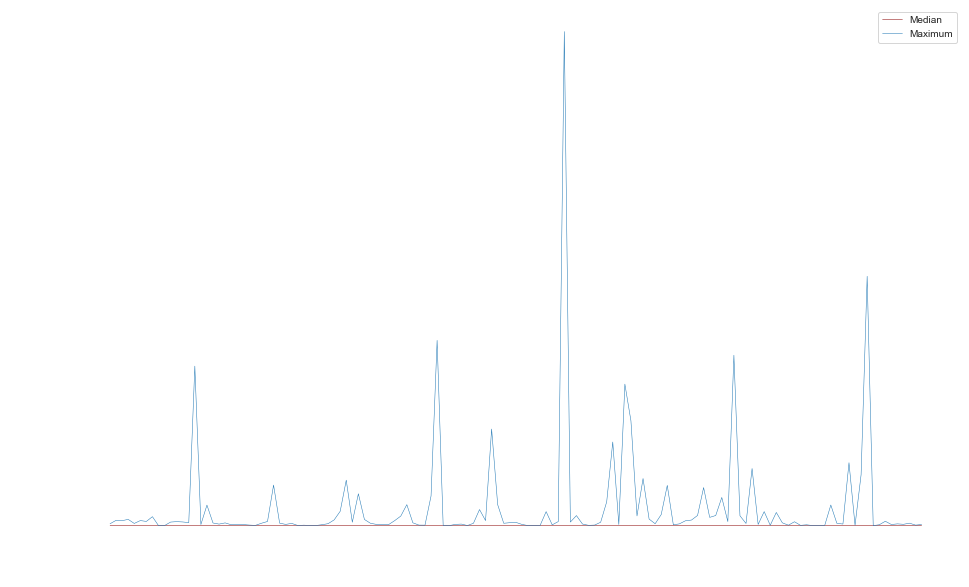

In [278]:
sns.set_style("white")

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

labels = list(median.index)

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            


a1 = sns.lineplot(median.index, median["fuel_cost"], label="Median", color="darkred", linewidth=.5)
a2 = sns.lineplot(max_.index, max_["fuel_cost"], label="Maximum", palette="darkgrey", linewidth=.5 )

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
a1.set_yticklabels(yticks)

plt.axis('off')

#plt.title("Utility Fuel Costs per Month")
blah = a1.set_xticklabels(labels)

# Distribution of Prices

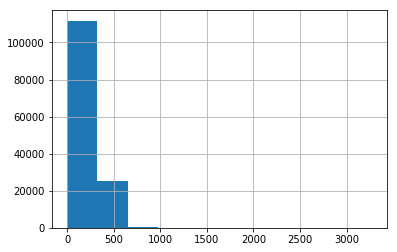

In [6]:
df[df.fuel_group == "Coal"].fuel_cost.hist()

In [8]:
df[df.fuel_group == "Coal"].fuel_cost.describe()

count    137568.000000
mean        249.022651
std          95.492070
min           0.000000
25%         183.700000
50%         229.800000
75%         299.700000
max        3267.000000
Name: fuel_cost, dtype: float64

In [11]:
df[df.fuel_group == "Coal"].fuel_cost.quantile(.97)

461.5

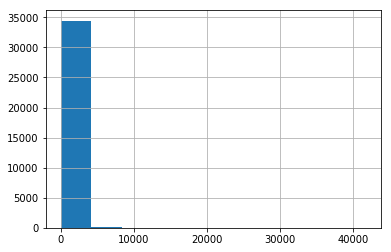

In [12]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.hist()

In [14]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.describe()

count    34644.000000
mean      1735.594972
std        731.184628
min          0.000000
25%       1296.400000
50%       1694.400000
75%       2239.625000
max      41671.200000
Name: fuel_cost, dtype: float64

No handles with labels found to put in legend.


(-595564.3264857733,
 17997139.32648577,
 -205.09390233750003,
 3236.8939023374996)

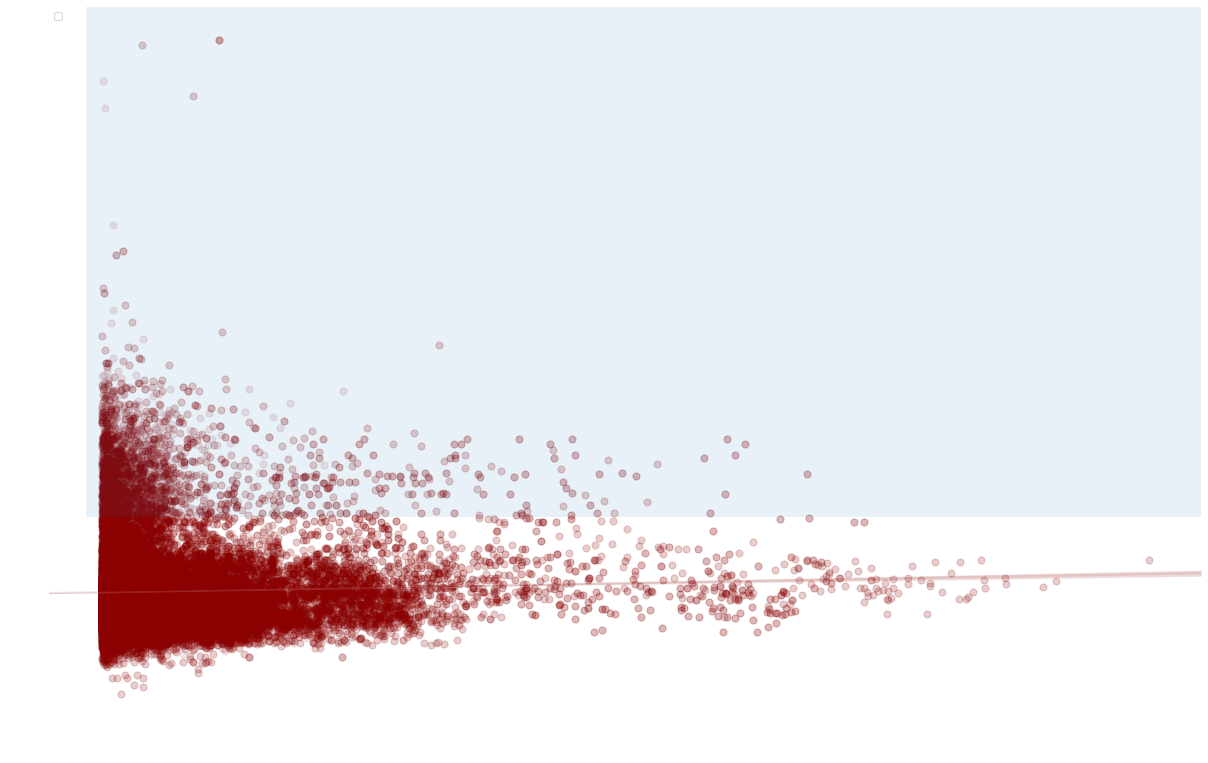

In [283]:
df2 = df[(df.quantity > 250000) & (df["fuel_group"] == "Natural Gas")]

fig = plt.figure(figsize=(16,10))
ax=fig.add_axes([0,0,1,1])

rect = patches.Rectangle((0, 800),21000000,2700,linewidth=0,edgecolor='r', zorder=1, alpha=.1)

a1 = sns.regplot(x="quantity", y="fuel_cost", data=df2, line_kws={"color":"darkred","alpha":0.1,}, scatter_kws={"color":"darkred","alpha":0.1,"s":50})



# Add the patch to the Axes
ax.add_patch(rect)
plt.legend()
plt.axis('off')

#plt.title("Natural Gas Fuel Cost vs. Quantity Purchased")

In [34]:
df2.fuel_cost.median()

425.0

In [22]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.quantile(.98)

2940.9079999999985

# Individual Suppliers

## Pacific Biodiesel

In [284]:
df_s = df[df["supplier"] == "PACIFIC BIODIESEL"]
df_o = df[(df["fuel_group"] != "Coal") & (df["fuel_group"] != "Natural Gas")]

In [195]:
median_s.fuel_cost.head()

year_month
2012-1     5038.7
2012-10    5236.8
2012-11    5236.8
2012-12    5236.8
2012-3     5038.7
Name: fuel_cost, dtype: float64

In [285]:
median_s = df_s.groupby("year_month").median()
max_s = df_s.groupby("year_month").max()
median_o = df_o.groupby("year_month").median()
max_o = df_o.groupby("year_month").max()


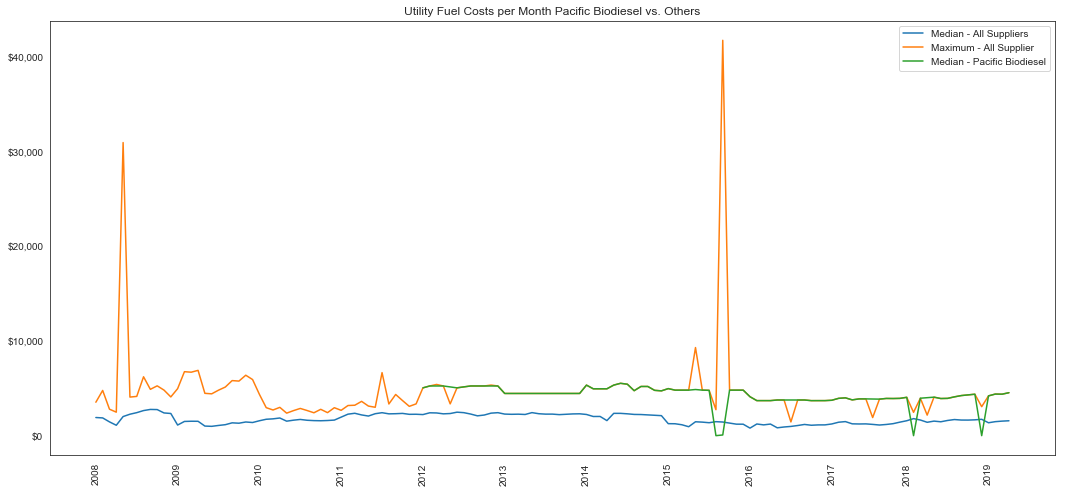

In [287]:
sns.set_style("white")

fig = plt.figure(figsize=(18,8))
plt.xticks(rotation=90)

labels = list(max_o.index)

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            


a1 = sns.lineplot(median_o.index, median_o["fuel_cost"], label="Median - All Suppliers")
a2 = sns.lineplot(max_o.index, max_o["fuel_cost"], label="Maximum - All Supplier")

a3 = sns.lineplot(median_s.index, median_s["fuel_cost"], label="Median - Pacific Biodiesel")
#a4 = sns.lineplot(max_s.index, max_s["fuel_cost"], label="Maximum - Pacific Biodiesel")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
a1.set_yticklabels(yticks)

plt.title("Utility Fuel Costs per Month Pacific Biodiesel vs. Others")
blah = a1.set_xticklabels(labels)

## Natural Gas and Virginia Power & Elec.

In [288]:
df_s = df[(df["operator_id"] == "19876.0") & (df["fuel_group"] == "Natural Gas")]
df_o = df[(df["fuel_group"] == "Natural Gas")]

In [289]:
def set_styles(labels):
    sns.set_style("white")

    fig = plt.figure(figsize=(16,10))
    plt.xticks(rotation=90)
    for i,label in enumerate(labels):
        if "-" in label:
            if int(label.split("-")[1]) == 1:
                labels[i] = label.split("-")[0]
            else:
                labels[i] = ""
        yticks = list(plt.yticks())

    yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
    a1.set_yticklabels(yticks)
    
    return labels

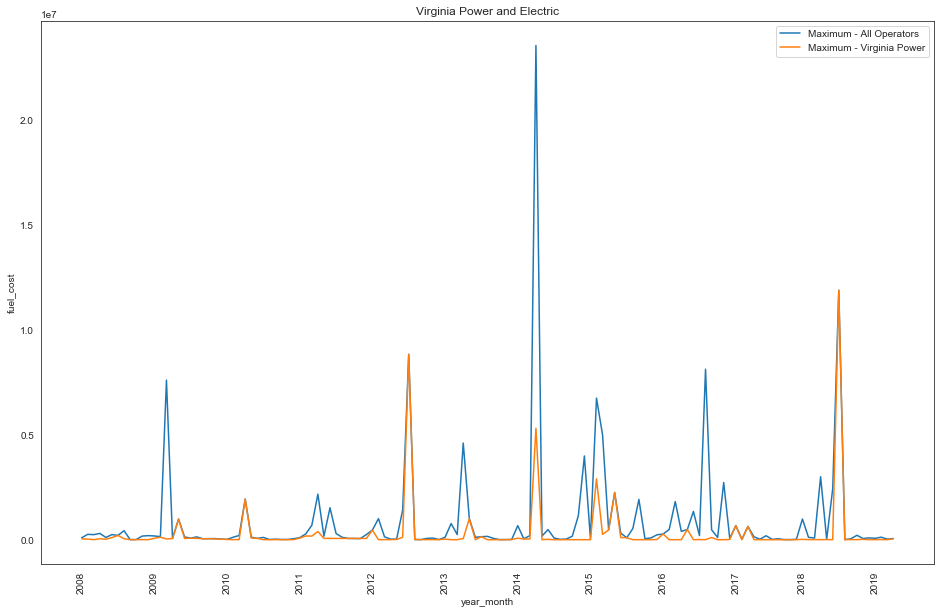

In [290]:
median_s = df_s.groupby("year_month").median()
max_s = df_s.groupby("year_month").max()
median_o = df_o.groupby("year_month").median()
max_o = df_o.groupby("year_month").max()

labels = set_styles(list(max_o.index))
a2 = sns.lineplot(max_o.index, max_o["fuel_cost"], label="Maximum - All Operators")
a4 = sns.lineplot(max_s.index, max_s["fuel_cost"], label="Maximum - Virginia Power")

plt.title("Virginia Power and Electric")

plt.legend()

blah = a2.set_xticklabels(labels)


## Supplier LG&E

In [293]:
df_s = df[(df["supplier"] == "LG&E") & (df["fuel_group"] == "Natural Gas")]
df_o = df[(df["fuel_group"] == "Natural Gas")]

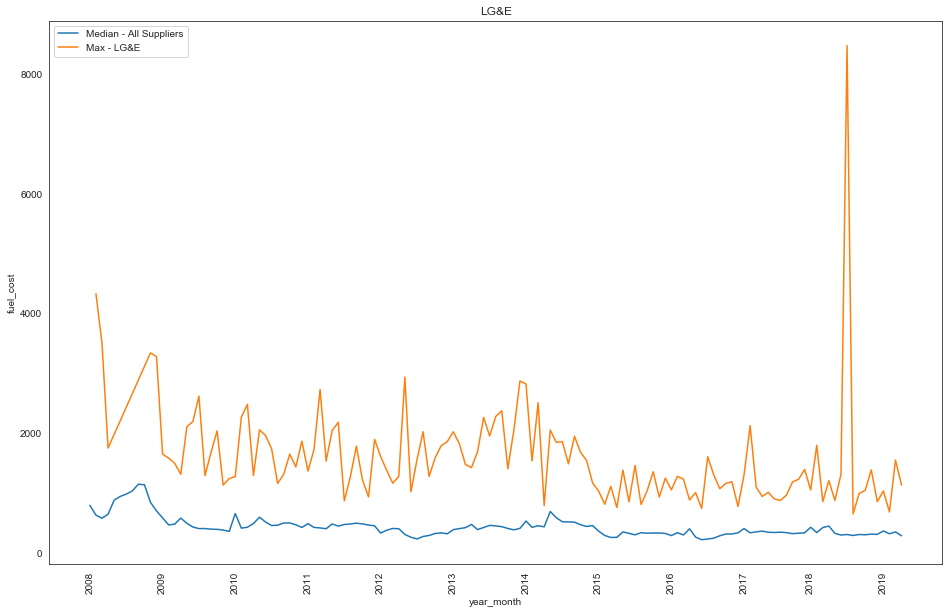

In [299]:
median_s = df_s.groupby("year_month").median()
max_s = df_s.groupby("year_month").max()
median_o = df_o.groupby("year_month").median()
max_o = df_o.groupby("year_month").max()

labels = set_styles(list(max_o.index))
a2 = sns.lineplot(median_o.index, median_o["fuel_cost"], label="Median - All Suppliers")
#a4 = sns.lineplot(median_s.index, median_s["fuel_cost"], label="Median - LG&E")

#a3 = sns.lineplot(max_o.index, max_o["fuel_cost"]/100, label="Max - All Suppliers")
a4 = sns.lineplot(max_s.index, max_s["fuel_cost"], label="Max - LG&E")
plt.title("LG&E")

plt.legend()

blah = a2.set_xticklabels(labels)


In [236]:
df_s = df[(df["supplier"] == "JP MORGAN VENTURES ENERGY") & (df["fuel_group"] == "Coal")]
df_o = df[(df["fuel_group"] == "Coal")]

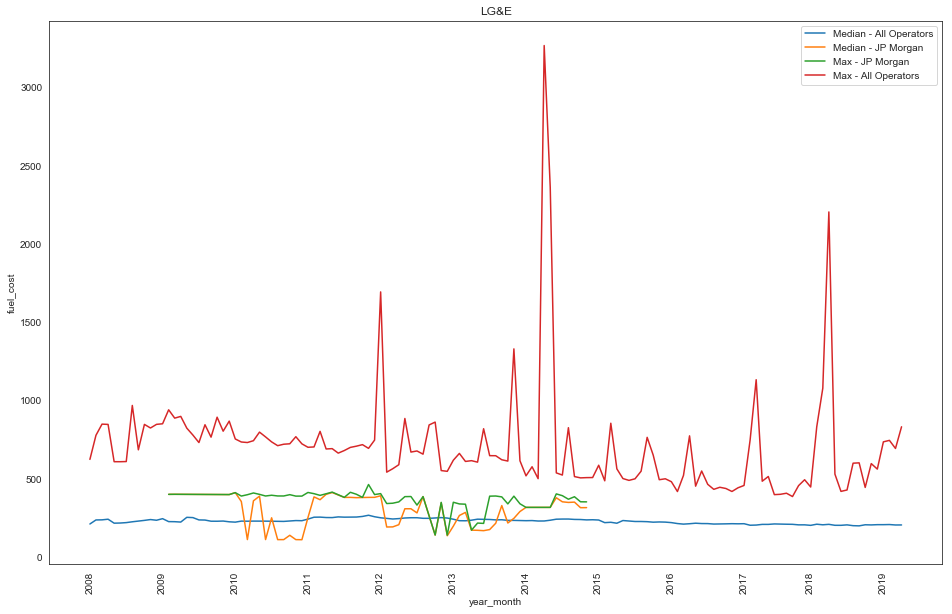

In [238]:
median_s = df_s.groupby("year_month").median()
max_s = df_s.groupby("year_month").max()
median_o = df_o.groupby("year_month").median()
max_o = df_o.groupby("year_month").max()

labels = set_styles(list(max_o.index))
a2 = sns.lineplot(median_o.index, median_o["fuel_cost"], label="Median - All Operators")
a4 = sns.lineplot(median_s.index, median_s["fuel_cost"], label="Median - JP Morgan")

a4 = sns.lineplot(max_s.index, max_s["fuel_cost"], label="Max - JP Morgan")
a4 = sns.lineplot(max_o.index, max_o["fuel_cost"], label="Max - All Operators")
plt.title("LG&E")

plt.legend()

blah = a2.set_xticklabels(labels)


In [234]:
df[(df["fuel_group"] == "Coal")].sort_values("fuel_cost", ascending=False).head(500).coalmine_state.value_counts()

KY    265
WV    134
CL     29
VA     22
LA     13
VZ     12
AL      8
WY      5
CO      3
UT      2
IN      2
PA      2
ND      1
TX      1
NM      1
Name: coalmine_state, dtype: int64

In [239]:
df_s = df[(df["fuel_group"] == "Coal") & ((df.coalmine_state == 'CL') | (df.coalmine_state == 'VZ'))]

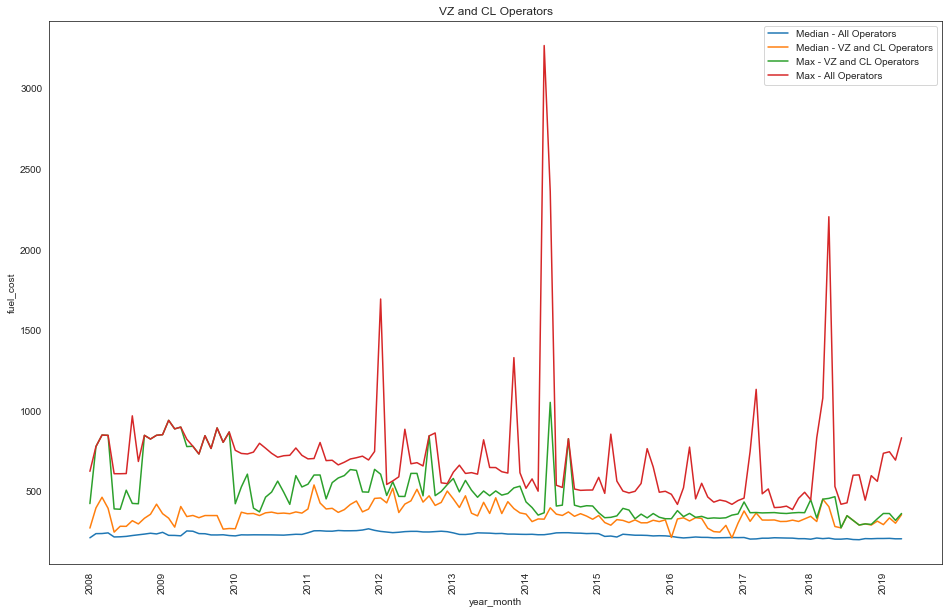

In [240]:
median_s = df_s.groupby("year_month").median()
max_s = df_s.groupby("year_month").max()
median_o = df_o.groupby("year_month").median()
max_o = df_o.groupby("year_month").max()

labels = set_styles(list(max_o.index))
a2 = sns.lineplot(median_o.index, median_o["fuel_cost"], label="Median - All Operators")
a4 = sns.lineplot(median_s.index, median_s["fuel_cost"], label="Median - VZ and CL Operators")

a4 = sns.lineplot(max_s.index, max_s["fuel_cost"], label="Max - VZ and CL Operators")
a4 = sns.lineplot(max_o.index, max_o["fuel_cost"], label="Max - All Operators")
plt.title("VZ and CL Operators")

plt.legend()

blah = a2.set_xticklabels(labels)


# Feature Bar Graphs

In [252]:
ng_features = pd.DataFrame([["net_generation_megawatthours", 0.2000873804818738],
["primary_transportation_mode_pipeline", 0.16883292310929898],
["quantity", 0.10335812569910117],
["mmbtu_per_unit_gen", 0.039994980759194054],
["disturbance_events", 0.03738434137843032],
["operator_id_19876.0", 0.03082785674026425],
["supplier_various", 0.03022527767189032],
["operator_id_12745", 0.028904979342346666],
["plant_state_NY", 0.02545222229682147],
["plant_id_56328", 0.02011661237170358],
["supplier_LG&E", 0.01975793896187076],
["plant_id_7314", 0.019400324671978633],
["secondary_transportation_mode_pipeline", 0.01928613407717607],
["operator_id_15296.0", 0.016296218437188235],
["reported_prime_mover_CT", 0.015715061493149263],
["plant_id_8219", 0.014097304209078],
["nerc_region_FRCC", 0.013689890470109711],
["supplier_MUNIGAS - BP ENERGY", 0.013618843019710742],
["nerc_region_WECC", 0.01255009168427835],
["supplier_VIRGINIA POWER SERVICES ENERGY", 0.012390891474241312],
["supplier_BPE", 0.009197773077475614]])

Text(0, 0.5, '')

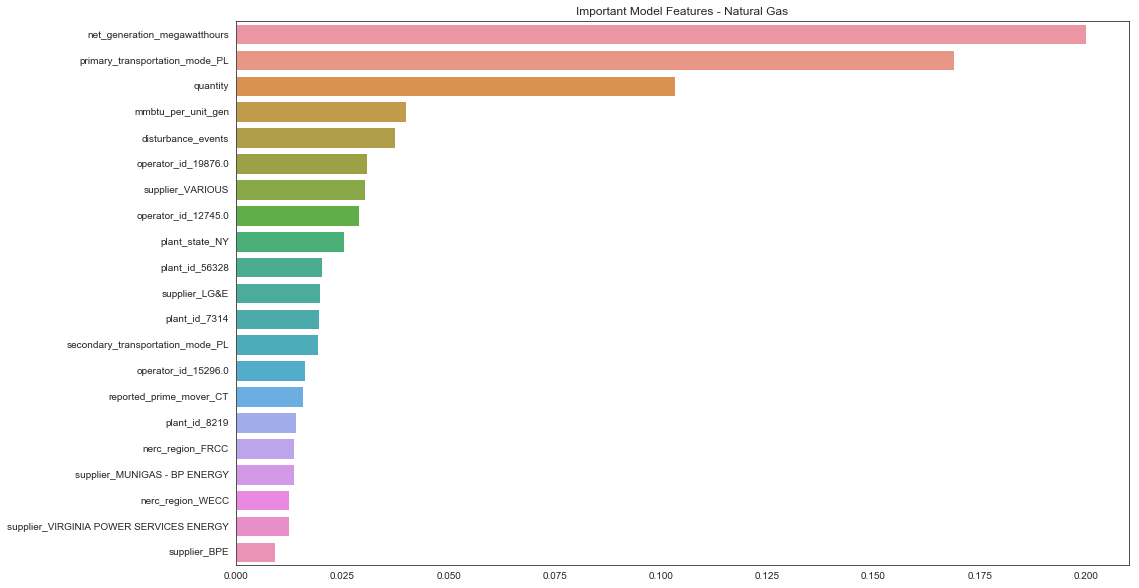

In [259]:
fig = plt.figure(figsize=(16,10))

sns.barplot(x=1, y=0, data=ng_features, orient="h")
plt.title("Important Model Features - Natural Gas")
plt.xlabel("")
plt.ylabel("")

In [263]:
coal_features = pd.DataFrame([["average_heat_content",  0.24269947984018175],
["average_sulfur_content",  0.07889742461763186],
["primary_transportation_mode_RR",  0.0674438778637404],
["net_generation_megawatthours",  0.0654801754911223],
["quantity",  0.04572021578662917],
["mmbtu_per_unit_gen",  0.035824271533678315],
["average_ash_content",  0.030009349333486736],
["nerc_region_RFC",  0.016346171581014333],
["contract_type_S",  0.014685046461589907],
["nerc_region_WECC",  0.013434731876069465],
["coalmine_type_U",  0.012376714110869325],
["moisture_content",  0.011801201915297035],
["average_mercury_content",  0.010665933440092114],
["operator_id_195.0",  0.008508934264654815],
["nerc_region_FRCC",  0.007310446788376852],
["contract_type_C",  0.007255514953644726],
["operator_id_7801.0",  0.007078301892936548],
["operator_id_18642.0",  0.006303812512417558],
["purchase_type_S",  0.006000503420692189],
["secondary_transportation_mode_RV",  0.005722363913421393],
["coalmine_type_SU",  0.005615012970059115],
["plant_id_2682",  0.005336951904983158],
["coalmine_state_WV",  0.005164788864943287],
["coalmine_type_P",  0.004723907715730851],
["plant_state_KY",  0.0045669836850985215],
["plant_id_7213",  0.004562633174637347],
["plant_state_NC",  0.0044487060113613044]])

Text(0, 0.5, '')

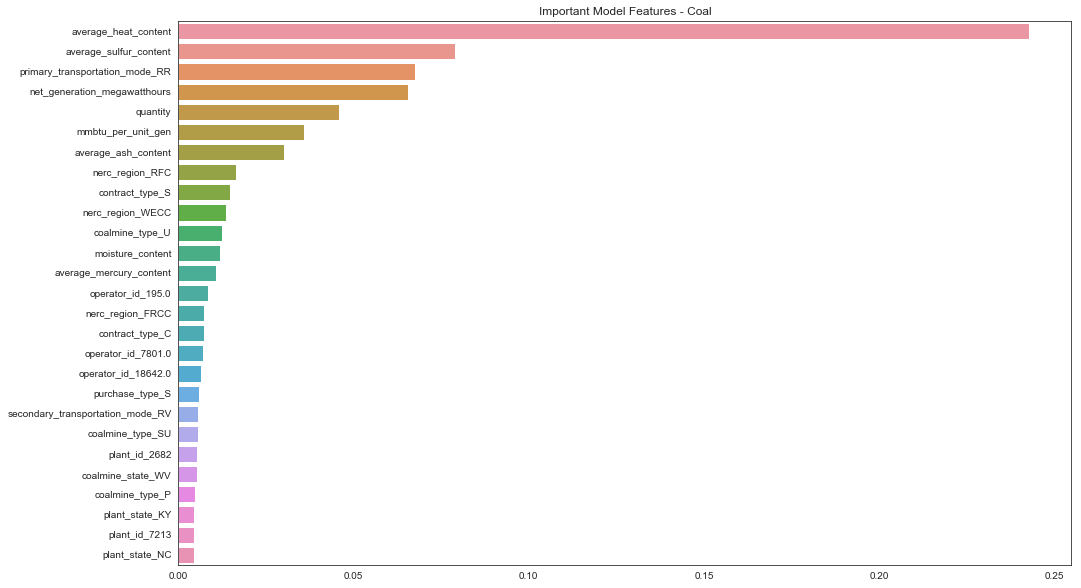

In [264]:
fig = plt.figure(figsize=(16,10))

sns.barplot(x=1, y=0, data=coal_features, orient="h")
plt.title("Important Model Features - Coal")
plt.xlabel("")
plt.ylabel("")

In [265]:
other_features = pd.DataFrame([["quantity", 0.34902638868860136],
["net_generation_megawatthours", 0.08720992467699985],
["average_heat_content", 0.06635480371660478],
["supplier_PACIFIC BIODIESEL", 0.062132622808579265],
["average_sulfur_content", 0.05156429893988355],
["mmbtu_per_unit_gen", 0.031710250663085644],
["number_affected", 0.011925219408571252],
["disturbance_events", 0.010769318911442876],
["census_region_MTN", 0.007258697900479671],
["contract_type_N/A", 0.007245236819584759],
["reporting_frequency_A", 0.005353884318361435],
["energy_source_DFO", 0.00496248959779158],
["plant_name_Syl Laskin", 0.004679688150336081],
["contract_type_S", 0.004648459010342745],
["supplier_EDWARDA OIL", 0.004625836154710083],
["plant_state_NY", 0.004380404960602933],
["plant_id_2824", 0.004168006621182126],
["plant_id_642", 0.0040972043449264235],
["operator_name_City of Tallahassee", 0.004094350781238758],
["plant_name_Hallam", 0.0037501266103197035],
["census_region_WNC", 0.003693554473927997],
["operator_id_10071.0", 0.00368035877043231],
["supplier_MARATHON PETROLEUM", 0.003635491803107112],
["supplier_NAME PENDING", 0.0032628187917984643]])

Text(0, 0.5, '')

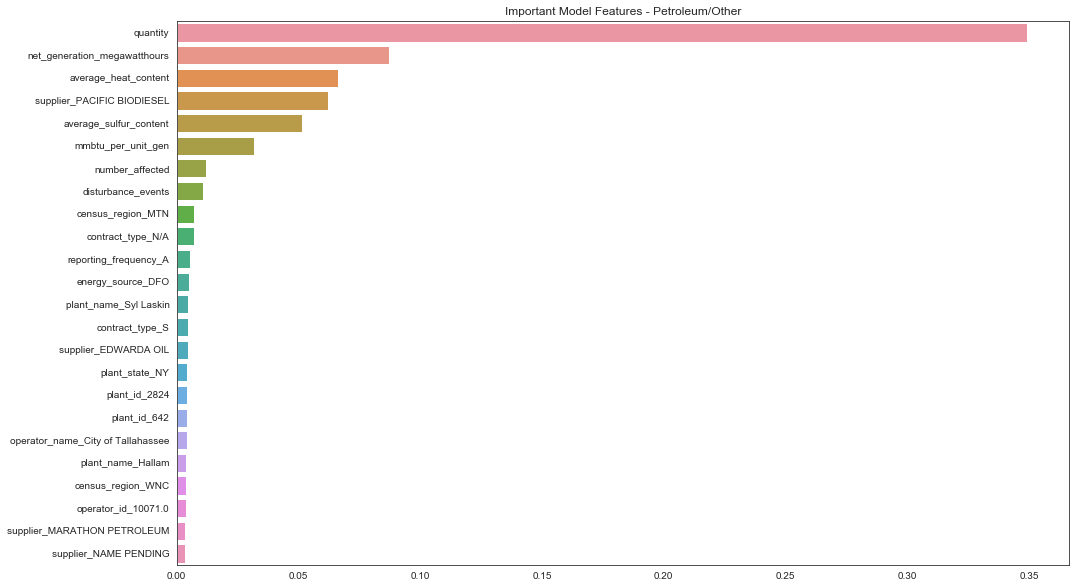

In [266]:
fig = plt.figure(figsize=(16,10))

sns.barplot(x=1, y=0, data=other_features, orient="h")
plt.title("Important Model Features - Petroleum/Other")
plt.xlabel("")
plt.ylabel("")

# Graphing Historic Costs

In [48]:
df_historic = pd.read_csv("ferc_data/all.csv")

In [49]:
df_historic.head()

,Unnamed: 0,fuel_cost,year,month
0,0,560.7,2000,1
1,1,143.3,2000,1
2,2,138.3,2000,1
3,3,130.8,2000,1
4,4,139.8,2000,1


In [58]:
df_historic["year_month"] = df_historic.apply(lambda x: str(int(x.year)) + "-" + str(int(x.month)), axis=1)

In [59]:
medians = df_historic.groupby("year_month").median()
maxes = df_historic.groupby("year_month").max()

1972-10


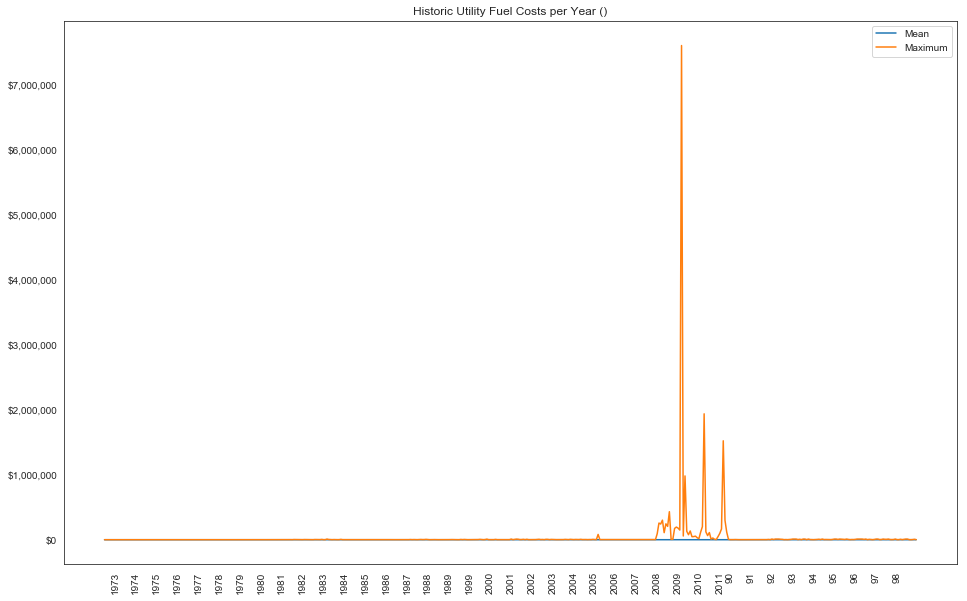

In [60]:
sns.set_style("white")

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

labels = list(medians.index)
print(labels[0])

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            

a1 = sns.lineplot(medians.index, medians["fuel_cost"], label="Mean")
a2 = sns.lineplot(maxes.index, maxes["fuel_cost"], label="Maximum")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)

plt.title("Historic Utility Fuel Costs per Year ()")
blah = a1.set_xticklabels(labels)

# Fuel Costs By Fuel Type

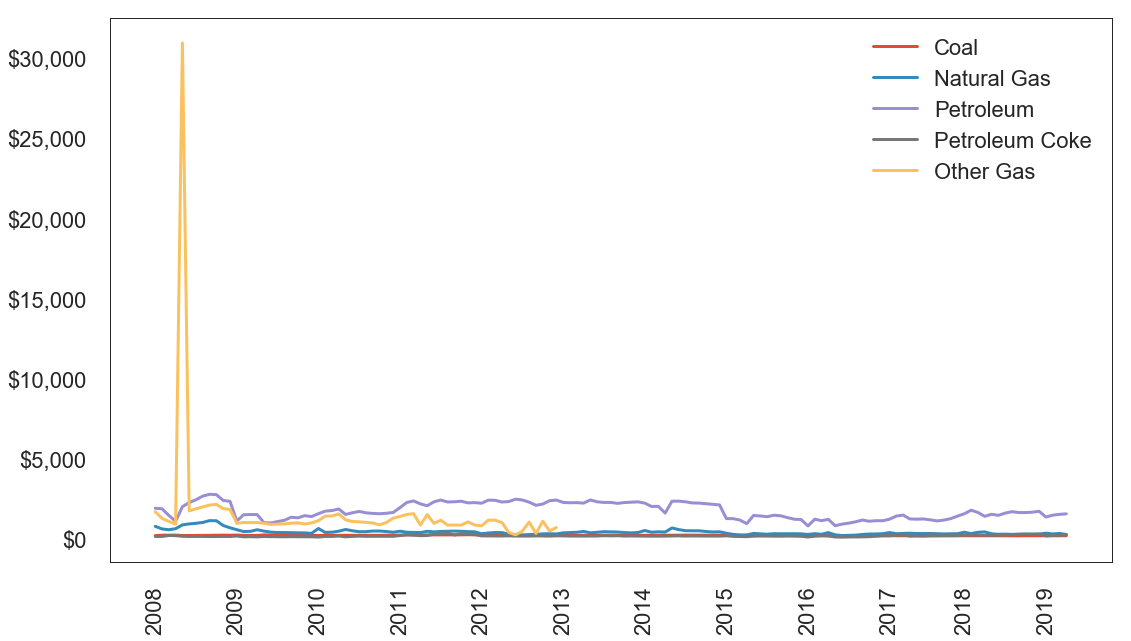

In [89]:

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

fuel_medians = []
types = df.fuel_group.unique()
for i, fuel_type in enumerate(types):
    median = df[df.fuel_group == fuel_type].groupby("year_month").median()
    a1 = sns.lineplot(median.index, median.fuel_cost, label=fuel_type)

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
blah = a1.set_xticklabels(labels)

In [96]:
df.drop(index=5412)[(df.fuel_group == "Other Gas") & (df.year == 2008) & (df.month==2)].sort_values(by="fuel_cost", ascending=False)[0:10]

/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year,plant_id_gen,combined_heat_and_power_plant,plant_name_gen,operator_name_gen,state_gen,census_region,nerc_region,reserved_,naics_code,eia_sector_number,sector_name,reported_prime_mover,reported_fuel_type_code,aer_fuel_type_code,reserved_1,reserved_2,physical_unit_label,total_fuel_consumption_quantity,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,elec_fuel_consumption_mmbtu,net_generation_megawatthours,year_gen,quantity_gen,elec_quantity_gen,mmbtu_per_unit_gen,tot_mmbtu_gen,elec_mmbtu_gen,netgen_gen,year_month_nerc,number_affected,disturbance_events,year_month


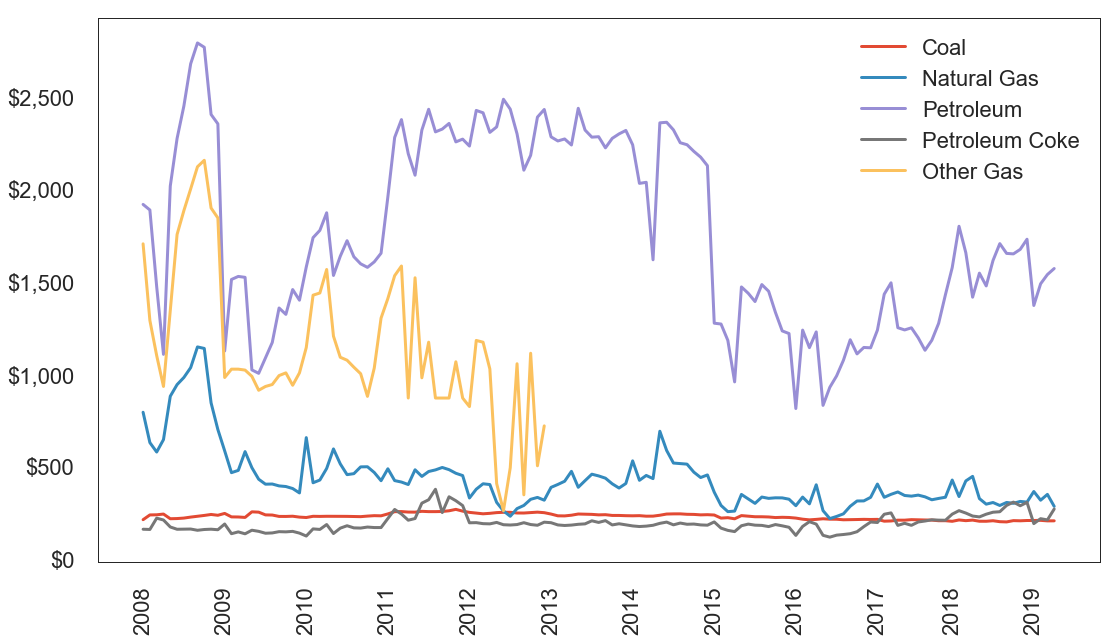

In [97]:
df = df.drop(index=5412)
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

fuel_medians = []
types = df.fuel_group.unique()
for i, fuel_type in enumerate(types):
    median = df[df.fuel_group == fuel_type].groupby("year_month").median()
    a1 = sns.lineplot(median.index, median.fuel_cost, label=fuel_type)

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
blah = a1.set_xticklabels(labels)

# Coal and Chlorine Content
Chlorine content wasn't defined for a lot of the coal data, but where it was defined, it apepared as a significant feature. 

It looks as if higher chlorine content coal recieved a higher price point. Various scientific papers point to high-chlorine content coal reducing mercury pollution, which is now regulated by MATS rules in the last few years.

In [23]:
df_c1 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] >0)].sort_values(["year", "month"])
grouped1 = df_c1.groupby("year_month").median()
df_c2 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] <=0)].sort_values(["year","month"])
grouped2 = df_c2.groupby("year_month").median()

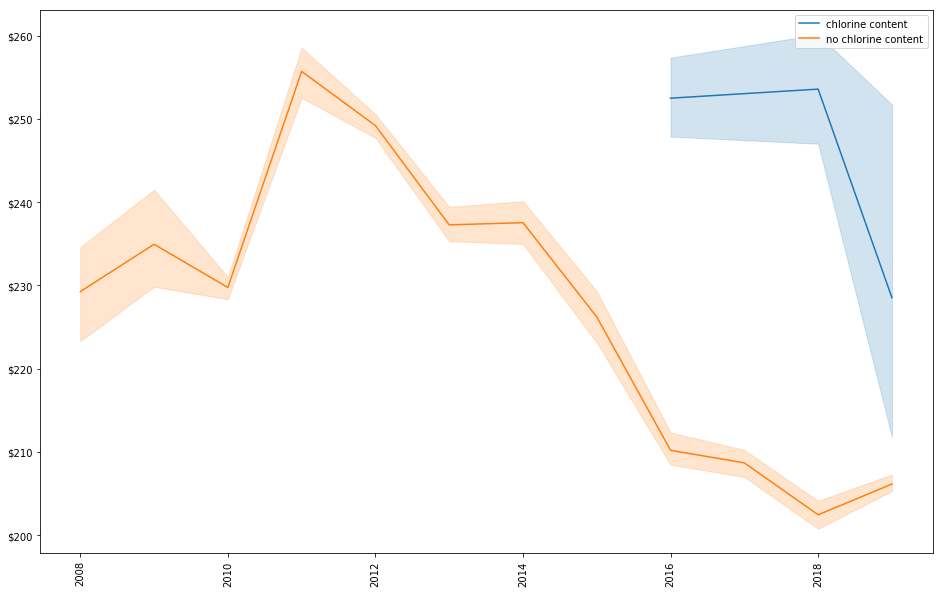

In [26]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

a1 = sns.lineplot(grouped1.year, grouped1.fuel_cost, label="chlorine content")
a1 = sns.lineplot(grouped2.year, grouped2.fuel_cost, label="no chlorine content")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

plt.title("Annual Median Price Paid for Coal (With vs. Without Chlorine Content)")

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
#blah = a1.set_xticklabels(labels)

In [27]:
df_c1 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] >0)].sort_values(["year", "month"])
grouped1 = df_c1.groupby("year_month").max()
df_c2 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] <=0)].sort_values(["year","month"])
grouped2 = df_c2.groupby("year_month").max()

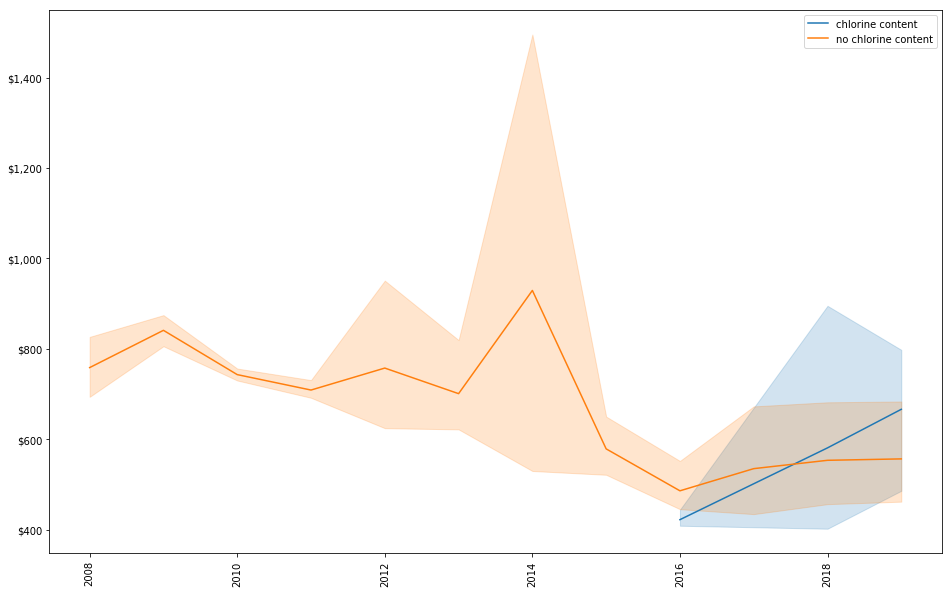

In [28]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

a1 = sns.lineplot(grouped1.year, grouped1.fuel_cost, label="chlorine content")
a1 = sns.lineplot(grouped2.year, grouped2.fuel_cost, label="no chlorine content")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

plt.title("Yearly Maximum Prices Paid for Coal, With vs. Without Chlorine")
yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
#blah = a1.set_xticklabels(labels)

# Natural Gas Tree Viz

In [97]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive

In [88]:
ng_fields = [ 'contract_type', 'fuel_cost', 'natural_gas_delivery_contract_type', 'natural_gas_supply_contract_type', 'natural_gas_transportation_service', 'operator_id',  'plant_id', 'plant_state', 'primary_transportation_mode', 'purchase_type', 'quantity', 'regulated', "reporting_frequency", "secondary_transportation_mode", "supplier", "combined_heat_and_power_plant", "nerc_region", "reported_prime_mover", "mmbtu_per_unit_gen", "disturbance_events", "number_affected", "net_generation_megawatthours"]

df_ng = df[df["fuel_group"] == "Natural Gas"][ng_fields]
not_encode = []
to_encode = []
for fld, fld_type in df_ng[ng_fields].dtypes.items():
    if "object" == fld_type:
        to_encode.append(fld)
    else:
        not_encode.append(fld)
temp1 = df_ng[not_encode].reset_index()
temp2 = pd.get_dummies(df_ng[to_encode]).reset_index()
df_ng = temp1.merge(temp2, on="index").set_index("index")


In [92]:
from sklearn.tree import DecisionTreeClassifier
from utils import cost_function, coster, get_scores
from sklearn.model_selection import train_test_split

In [100]:
X = df_ng.drop(columns=["fuel_cost"])
y = (df_ng.fuel_cost > df_ng.fuel_cost.quantile(.9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier(random_state=23, max_depth=5)
results = model.fit(X_train, y_train)

In [101]:
y_pred = results.predict(X_test)
get_scores(y_test, y_pred, X_test)

Precision: 0.6860119047619048
Recall: 0.08532296872108087
F1: 0.15176954732510287
       0    1
0  48077  211
1   4942  461
Cost Function: -0.05262366184480849


The limited tree doesnt have a great f1 score (lots of false positives, but decent cost)

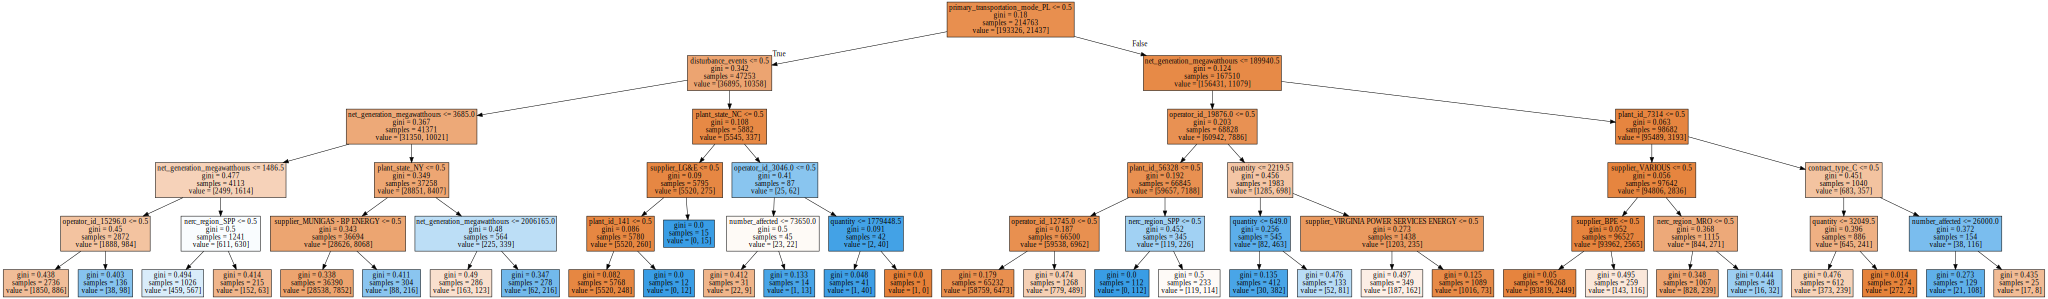

In [103]:
graph = Source(export_graphviz(results, out_file=None, feature_names=X.columns, filled=True))
SVG(graph.pipe(format='svg'))

In [104]:
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [105]:
X = df_ng.drop(columns=["fuel_cost"])
y = (df_ng.fuel_cost > df_ng.fuel_cost.quantile(.9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier(random_state=23, max_depth=10)
results = model.fit(X_train, y_train)

In [ ]:
cross_val_score(results, X, y, scoring=coster, cv=20)

# Data Reporting Issues

In [119]:
cts = df.groupby(["year","month"]).count().sort_values(["year", "month"])

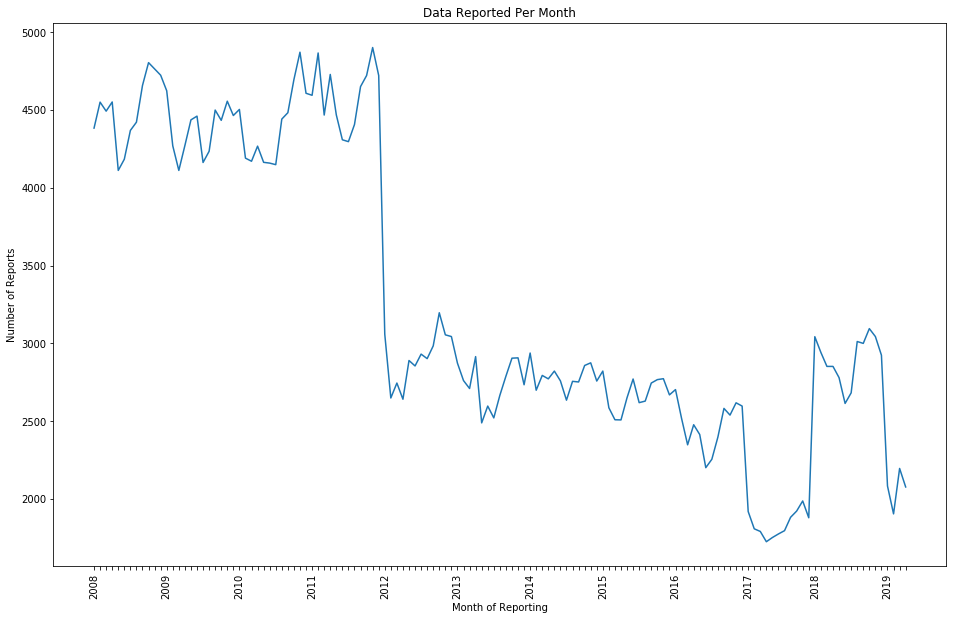

In [169]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
a1 = sns.lineplot(cts.year_month, cts.fuel_cost)

labels = list(cts.index)

for i,label in enumerate(labels):
    if not int(label[1]) == 1:
        labels[i] = ""
    else:
        labels[i] = label[0]

plt.title("Data Reported Per Month")
plt.ylabel("Number of Reports")
plt.xlabel("Month of Reporting")
blah = a1.set_xticklabels(labels)

In [142]:
np.array(cts.index.get_level_values(0))[0]

2008

In [135]:
cts.index.get_level_values(1)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             7,  8,  9, 10, 11, 12,  1,  2,  3,  4],
           dtype='int64', name='month', length=135)

In [151]:
cts["year"] = np.array(cts.index.get_level_values(0))

In [152]:
cts["month"] = np.array(cts.index.get_level_values(1))

In [155]:
cts.year_month = cts.apply(lambda x: str(x.year) + "-" + str(x.month), axis=1)

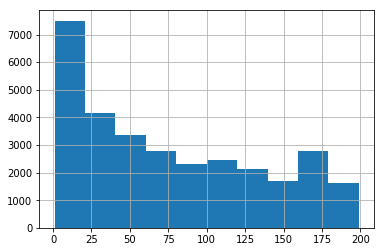

In [174]:
df[df.quantity < 200].quantity.hist()

In [175]:
cts2 = df[df.quantity < 200].groupby(["year","month"]).count().sort_values(["year", "month"])

In [177]:
cts2["year"] = np.array(cts2.index.get_level_values(0))
cts2["month"] = np.array(cts2.index.get_level_values(1))
cts2.year_month = cts2.apply(lambda x: str(x.year) + "-" + str(x.month), axis=1)

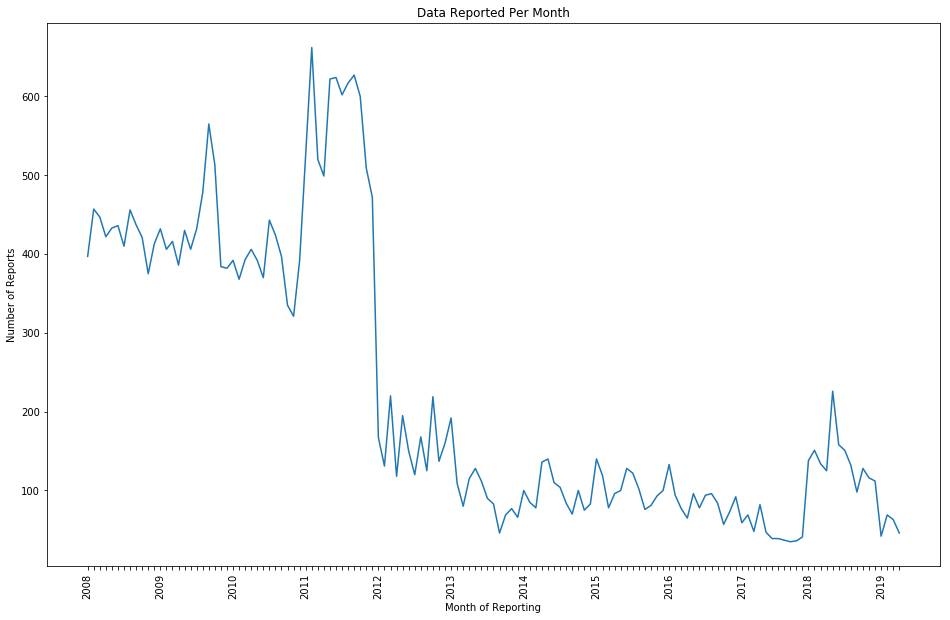

In [178]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
a1 = sns.lineplot(cts2.year_month, cts2.fuel_cost)

labels = list(cts2.index)

for i,label in enumerate(labels):
    if not int(label[1]) == 1:
        labels[i] = ""
    else:
        labels[i] = label[0]

plt.title("Data Reported Per Month")
plt.ylabel("Number of Reports")
plt.xlabel("Month of Reporting")
blah = a1.set_xticklabels(labels)